In [1]:
# Resolução do professor no link abaixo:
# https://colab.research.google.com/drive/1jfKe3SqbFtJMY8krvwvWAosz4P0ZNcdp?usp=sharing

import pandas as pd
df = pd.read_csv('treino.csv')
df

,id,texto,classe
0,675,lula diz que senado tem maioridade para resolv...,neutro
1,1733,adolescente é morto por ouvir música alta nos ...,tristeza
2,1855,coreia do sul insinua que hackers ligados à co...,neutro
3,1144,mamãe foca dá selinho em filhote recém-nascido...,alegria
4,462,adolescente de 15 anos que estava sumida é ach...,tristeza
...,...,...,...
1695,8,polícia encontra cocaína escondida em boneco d...,surpresa
1696,1953,domingo no tca traz espetáculo cômico a r$ 1. ...,alegria
1697,864,mil desalojados dividem 4 chuveiros em abrigo ...,tristeza
1698,1498,manifestantes fazem ato contra reunião do g8 n...,desgosto


In [2]:
df.classe.value_counts()/len(df)

neutro      0.271176
tristeza    0.227647
desgosto    0.131176
surpresa    0.125882
medo        0.111176
alegria     0.091765
raiva       0.041176
Name: classe, dtype: float64

In [3]:
df.isna().sum()

id        0
texto     0
classe    0
dtype: int64

In [4]:
#retirando a feature id e embaralhando o dataset
df = df.drop('id', axis=1).sample(frac=1) 

In [5]:
df.sample(15)

,texto,classe
1648,filhote de jacaré é capturado por moradores de...,surpresa
1489,petrobras afirma que perfuração de poços do pr...,alegria
1390,equipes encontram 22 corpos em queda de avião ...,tristeza
1017,convidados param churrasco para ver cobra devo...,surpresa
759,panda gigante surpreende e dá à luz em zoológi...,surpresa
439,mortos em explosão e desabamento de prédios em...,tristeza
1487,assad diz que vai permanecer na síria. em entr...,neutro
855,ator brigou com esposa por causa de dinheiro a...,tristeza
1537,morte de mulher após cirurgia levanta suspeita...,tristeza
1136,cabaceiras do paraguaçu recebe programação fes...,alegria


In [6]:
#separando X e y
X = df.drop('classe', axis=1)
y = df['classe']
X.shape

(1700, 1)

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_new_counts = count_vect.fit_transform(X.texto)
X_new_counts.shape

(1700, 10101)

In [8]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()
X_tfidf = tfidf.fit_transform(X_new_counts, y)
X = pd.DataFrame(X_tfidf.toarray())
X

,0,1,2,3,4,5,6,7,8,9,...,10091,10092,10093,10094,10095,10096,10097,10098,10099,10100
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.141544,0.0,0.0,0.0,0.0,0.185469,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1696,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1697,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1698,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [9]:
# Dividir o dataset entre treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,10091,10092,10093,10094,10095,10096,10097,10098,10099,10100
1149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.20751,0.0,0.0,0.0,0.0,0.0,0.0,0.0
192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
model = clf.fit(X_train, y_train)
model

MultinomialNB()

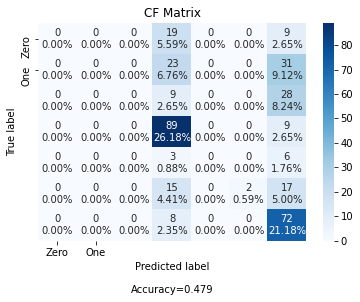

In [11]:
# mostrar matrix de confusão
import ds_util as util
util.getConfusionMatrixHeatMap(model, X_test, y_test);

In [18]:
df = pd.concat([X, y], axis=1)
df.columns
df.to_csv('sentimentos.csv')

In [ ]:
from autoML import AutoML
automl = AutoML(df, y_colname='classe')
automl.setMinXYcorrRate(0.01)
automl.getResults()